In [1]:
!git clone https://github.com/AI4Finance-LLC/FinRL-Library.git

Cloning into 'FinRL-Library'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 2857 (delta 9), reused 12 (delta 2), pack-reused 2829
Receiving objects: 100% (2857/2857), 30.70 MiB | 7.41 MiB/s, done.
Resolving deltas: 100% (1710/1710), done.


In [2]:
pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-7ot8ws8r
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-7ot8ws8r
     |████████████████████████████████| 153kB 5.6MB/s 
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-94vlw_ab/pyfolio
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-94vlw_ab/pyfolio
     |████████████████████████████████| 5.5MB 7.8MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for finrl: filename=finrl-0.3.0-cp37-none-any.whl size=38673 sha256=7f3d4b1a43969a339cb1f7c56dca56f3ec35697fac685033d9b93d8af333edc3
  Stored in directory: /tmp/pip-ephem-wheel-cache-eoz6sv20/wheels/9c/19/bf/c644def96612df1ad42c94d5304966797eaa3221dffc5efe0b
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=9ca786ebd8704e81f8572f6afd21c19a0d1fe3550fbedd46bfa52199416ff515
  

In [3]:
cd /content/FinRL-Library/

/content/FinRL-Library


In [4]:
pip install -r requirements.txt


In [5]:
#importing libraies
import pandas as pd
import numpy as np
import matplotlib
import datetime


In [6]:
from finrl.marketdata.yahoodownloader import YahooDownloader

dataDF = YahooDownloader(start_date = '2020-02-01', end_date = '2021-02-01', ticker_list = ['AAPL']).fetch_data()
dataDF.head(20)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (251, 8)


,date,open,high,low,close,volume,tic,day
0,2020-02-03,76.074997,78.372498,75.555000,76.390160,173985600,AAPL,0
1,2020-02-04,78.827499,79.910004,78.407501,78.912079,136616400,AAPL,1
2,2020-02-05,80.879997,81.190002,79.737503,79.555550,118826800,AAPL,2
3,2020-02-06,80.642502,81.305000,80.065002,80.486107,105425600,AAPL,3
4,2020-02-07,80.592499,80.849998,79.500000,79.392090,117684000,AAPL,4
5,2020-02-10,78.544998,80.387497,78.462502,79.769165,109348800,AAPL,0
6,2020-02-11,80.900002,80.974998,79.677498,79.287888,94323200,AAPL,1
7,2020-02-12,80.367500,81.805000,80.367500,81.170799,113730400,AAPL,2
8,2020-02-13,81.047501,81.555000,80.837502,80.592773,94747600,AAPL,3
9,2020-02-14,81.184998,81.495003,80.712502,80.612625,80113600,AAPL,4


In [7]:
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.config import config

In [8]:
tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

##  https://github.com/jealous/stockstats
tech_indicator_list=tech_indicator_list+['kdjk','open_2_sma','boll','close_10.0_le_5_c','wr_10','dma','trix']
print(tech_indicator_list)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma', 'kdjk', 'open_2_sma', 'boll', 'close_10.0_le_5_c', 'wr_10', 'dma', 'trix']


In [9]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=False,
                    user_defined_feature = False)

data_df = fe.preprocess_data(dataDF)
data_df.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,kdjk,open_2_sma,boll,close_10.0_le_5_c,wr_10,dma,trix
0,2020-02-03,76.074997,78.372498,75.555000,76.390160,173985600,AAPL,0,0.000000,81.217652,74.084587,100.000000,66.666667,100.000000,76.390160,76.390160,43.213962,76.074997,76.390160,0.0,70.358115,0.0,0.524675
1,2020-02-04,78.827499,79.910004,78.407501,78.912079,136616400,AAPL,1,0.056582,81.217652,74.084587,100.000000,66.666667,100.000000,77.651119,77.651119,54.504493,77.451248,77.651119,0.0,22.914444,0.0,0.524675
2,2020-02-05,80.879997,81.190002,79.737503,79.555550,118826800,AAPL,2,0.092050,81.631954,74.939904,100.000000,78.577118,100.000000,78.285929,78.285929,60.001208,79.853748,78.285929,0.0,29.005363,0.0,0.435891
3,2020-02-06,80.642502,81.305000,80.065002,80.486107,105425600,AAPL,3,0.139523,82.343780,75.328168,100.000000,79.043281,100.000000,78.835974,78.835974,68.586930,80.761250,78.835974,0.0,14.241625,0.0,0.401333
4,2020-02-07,80.592499,80.849998,79.500000,79.392090,117684000,AAPL,4,0.118849,82.025498,75.868896,77.548879,36.455428,62.968347,78.947197,78.947197,67.968617,80.617500,78.947197,0.0,33.268008,0.0,0.337646


In [10]:
#test train split
from finrl.preprocessing.data import data_split
train = data_split(data_df, start = '2020-02-01', end = '2021-01-01')
trade = data_split(data_df, start = '2021-01-01', end = '2021-02-01')

In [11]:
from finrl.env.env_stocktrading import StockTradingEnv

stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.TECHNICAL_INDICATORS_LIST)*stock_dimension
print(f"Stock data Dimensions: {stock_dimension}, State Spaces: {state_space}")


env_kwargs = {
    "hmax": 100, 
    "initial_amount": 100000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
    
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

Stock data Dimensions: 1, State Spaces: 11
<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [12]:
#agent

from finrl.model.models import DRLAgent

agent = DRLAgent(env = env_train)

In [13]:
#DDPG
DDPG_PARAMS = {"batch_size": 64, "buffer_size": 500000, "learning_rate": 0.0001}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=10000)

{'batch_size': 64, 'buffer_size': 500000, 'learning_rate': 0.0001}
Using cuda device
Logging to tensorboard_log/ddpg/ddpg_1
----------------------------------
| environment/        |          |
|    portfolio_value  | 1.57e+05 |
|    total_cost       | 99.9     |
|    total_reward     | 5.69e+04 |
|    total_reward_pct | 56.9     |
|    total_trades     | 231      |
| time/               |          |
|    episodes         | 4        |
|    fps              | 95       |
|    time_elapsed     | 9        |
|    total timesteps  | 928      |
| train/              |          |
|    actor_loss       | -212     |
|    critic_loss      | 3.17e+03 |
|    learning_rate    | 0.0001   |
|    n_updates        | 696      |
----------------------------------
----------------------------------
| environment/        |          |
|    portfolio_value  | 1.57e+05 |
|    total_cost       | 99.9     |
|    total_reward     | 5.69e+04 |
|    total_reward_pct | 56.9     |
|    total_trades     | 231      |
|

In [14]:
trade.tail()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,kdjk,open_2_sma,boll,close_10.0_le_5_c,wr_10,dma,trix
14,2021-01-25,143.070007,145.089996,136.539993,142.706757,157611700,AAPL,0,2.893048,140.359461,123.583127,63.464700,223.661933,41.580164,130.236053,123.887571,74.161559,139.675003,131.971294,0.0,13.073178,6.211319,0.204324
15,2021-01-26,143.600006,144.300003,141.369995,142.946396,98390600,AAPL,1,3.428923,142.245794,122.814125,63.602796,222.273016,41.580164,130.899063,124.422630,78.837548,143.335007,132.529959,0.0,11.758645,7.154510,0.255819
16,2021-01-27,143.429993,144.300003,140.410004,141.848038,140843800,AAPL,2,3.722074,143.242157,122.353960,62.483000,187.424472,36.963482,131.553085,124.870937,79.937686,143.514999,132.798059,0.0,17.862037,8.022214,0.305510
17,2021-01-28,139.520004,141.990005,136.699997,136.885452,142621100,AAPL,3,3.513459,143.482821,122.334966,57.732186,111.677010,20.703554,132.062657,125.343855,71.557086,141.474998,132.908893,0.0,45.204115,8.285221,0.335667
18,2021-01-29,135.830002,136.740005,130.210007,131.763107,177180600,AAPL,4,2.901354,143.402758,122.239292,53.397006,9.862308,1.224336,132.198455,125.732896,56.562587,137.675003,132.821025,0.0,73.426411,8.356913,0.336470


In [15]:
trade = data_split(data_df, start = '2021-01-01', end = '2021-02-01')
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

df_account_value, df_actions = DRLAgent.DRL_prediction(model=model_ddpg, environment= e_trade_gym)


hit end!


In [16]:
df_account_value

,date,account_value
0,2021-01-04,100000.000000
1,2021-01-05,100146.837830
2,2021-01-06,99253.074005
3,2021-01-07,100534.498752
4,2021-01-08,100972.750749
5,2021-01-11,99426.858238
6,2021-01-12,99306.139517
7,2021-01-13,100754.097217
8,2021-01-14,99222.631235
9,2021-01-15,97861.754694


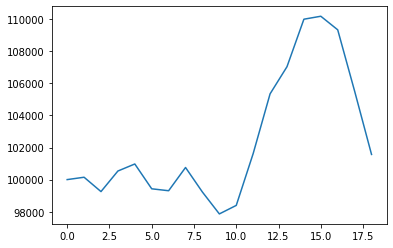

In [32]:
%matplotlib inline
df_account_value.account_value.plot()

In [30]:
from finrl.trade.backtest import backtest_stats

In [40]:
print("==============Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value= df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Results===========
Annual return          0.229126
Cumulative returns     0.015676
Annual volatility      0.328174
Sharpe ratio           0.818915
Calmar ratio           2.931646
Stability              0.462133
Max drawdown          -0.078156
Omega ratio            1.142859
Sortino ratio          1.229542
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.945475
Daily value at risk   -0.040280
dtype: float64




---

